In [1]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import os

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go

%matplotlib inline

In [2]:
data_dir = os.path.join('D:', os.path.sep, 'Prg', 'Trading Bots', 'Market Dataset', 'dukascopy')
EUR_USD_1H = os.path.join(data_dir, 'EURUSD_Candlestick_1_Hour_BID_01.05.2023-18.05.2024.csv')
EUR_USD_1D = os.path.join(data_dir, 'EURUSD_Candlestick_1_D_BID_01.05.2023-18.05.2024.csv')
EUR_USD_Ticks = os.path.join(data_dir, 'EURUSD_Ticks_01.05.2023-01.05.2023.csv')

data_dir

'D:\\Prg\\Trading Bots\\Market Dataset\\dukascopy'

In [3]:
df_1H = pd.read_csv(EUR_USD_1H)
df_1D = pd.read_csv(EUR_USD_1D)
df_Tick = pd.read_csv(EUR_USD_Ticks)


In [4]:
print(df_1H.shape)
print(df_1D.shape)
print(df_Tick.shape)

(6558, 6)
(328, 6)
(78987, 5)


In [5]:
# Remove Holidays from 1H timeframe data.
df_1H['Date'] = df_1H['Gmt time'].str.split(' ', expand=True)[0]
holidays =  (df_1H[df_1H['Volume'] == 0].groupby('Date').count()['Close'] >= 24).index
df_ops =  df_1H[~ df_1H['Date'].isin(holidays)].copy()
print(df_ops.shape)
df_ops[df_ops['Volume'] == 0]

(6558, 7)


,Gmt time,Open,High,Low,Close,Volume,Date


In [7]:
df_ops.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

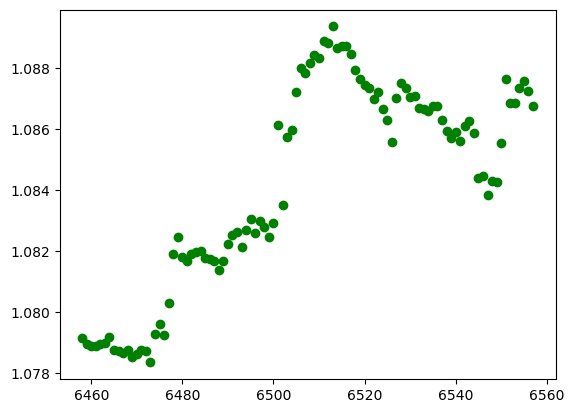

In [8]:
dfpl = df_ops[-100:]
plt.plot(dfpl.index, dfpl.Close, 'go')

In [78]:
df_ops['SMA_10'] = ta.sma(df_ops.Close, length=10)

df_ops['EMA_10'] = ta.ema(df_ops.Close, length=10)
df_ops['EMA_20'] = ta.ema(df_ops.Close, length=20)
df_ops['EMA_50'] = ta.ema(df_ops.Close, length=50)
df_ops['EMA_100'] = ta.ema(df_ops.Close, length=100)


df_ops['RSI_10'] = ta.rsi(df_ops.Close, length=10)

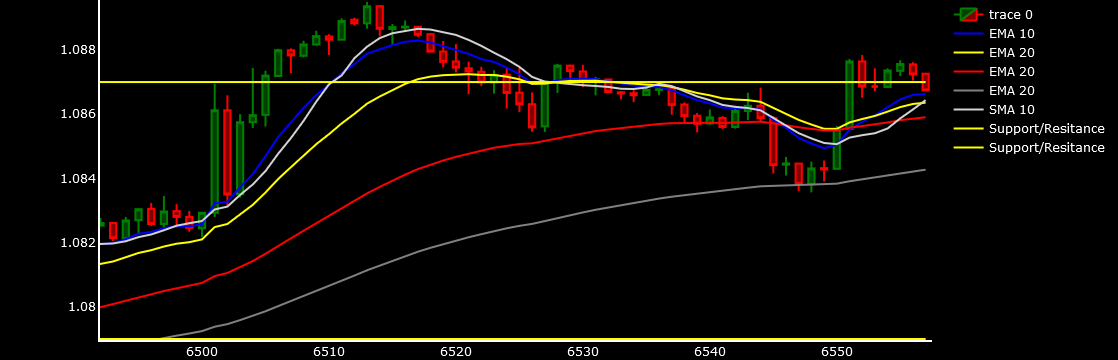

In [79]:
dfpl = df_ops[-240:]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                                     open=dfpl['Open'],
                                     high=dfpl['High'],
                                     low=dfpl['Low'],
                                     close=dfpl['Close'],
                                     increasing_line_color = 'green',
                                     decreasing_line_color = 'red'
                                    ),
                      go.Scatter(x=dfpl.index, y=dfpl.EMA_10, line=dict(color='blue', width=2), name='EMA 10'),
                      go.Scatter(x=dfpl.index, y=dfpl.EMA_20, line=dict(color='yellow', width=2), name='EMA 20'),
                      go.Scatter(x=dfpl.index, y=dfpl.EMA_50, line=dict(color='red', width=2), name='EMA 20'),
                      go.Scatter(x=dfpl.index, y=dfpl.EMA_100, line=dict(color='gray', width=2), name='EMA 20'),
                      go.Scatter(x=dfpl.index, y=dfpl.SMA_10, line=dict(color='lightgray', width=2), name='SMA 10'),
                      go.Scatter(x=dfpl.index, y=[1.079] * len(dfpl), line=dict(color='Yellow', width=2), name='Support/Resitance'),
                      go.Scatter(x=dfpl.index, y=[1.087] * len(dfpl), line=dict(color='Yellow', width=2), name='Support/Resitance'),
                      # go.Scatter(x=dfpl.index, y=dfpl['High'] + 0.0001, mode='markers', marker=dict(color='MediumPurple', size=5), name='Signal'),
                      # go.Scatter(x=dfpl.index, y=dfpl['Low'] -0.0001, mode='markers', marker=dict(color='MediumOrchid', size=5), name='Signal')
                     ])

fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(paper_bgcolor='black', plot_bgcolor='black',
                  margin_l=100, margin_b=0, margin_r=0, margin_t=0,
                  # font_family="Courier New",
                  font_color="white",
                  # title_font_family="Times New Roman",
                  title_font_color="yellow",
                  legend_title_font_color="pink")

fig.update_xaxes(showline=True, linewidth=2, linecolor='white', gridcolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='white', gridcolor='black')

fig.show()